## Numpy

In [2]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [27]:
import random
import time
n=10000
def random_array():
    array = [random.randint(0, 1000) for _ in range(n)]
    result = map(lambda a: a + 1, array)
    return list(result)

def numpy_array():
    array = np.random.randint(0, 1000, n)
    result = map(lambda a: a + 1, array)
    return list(result)

start = time.time()
random_a = random_array()
end1 = time.time()
numpy_a = numpy_array()
end2 = time.time()

print(numpy_a)
print(random_a)
print("Time for random: ", end1-start)
print("Time for numpy: ", end2-end1)

[420, 39, 52, 962, 661, 164, 580, 550, 261, 378, 103, 652, 395, 257, 632, 721, 668, 153, 455, 218, 208, 40, 521, 623, 132, 963, 65, 780, 360, 899, 110, 812, 479, 992, 877, 875, 432, 331, 661, 276, 673, 312, 945, 418, 478, 822, 550, 606, 806, 376, 796, 835, 292, 872, 33, 699, 863, 558, 442, 947, 281, 991, 813, 692, 592, 167, 171, 220, 415, 407, 756, 421, 787, 951, 745, 504, 162, 981, 427, 953, 217, 832, 317, 497, 291, 491, 510, 429, 308, 990, 198, 533, 888, 713, 535, 929, 860, 826, 700, 449, 229, 160, 424, 173, 414, 25, 781, 403, 359, 928, 204, 982, 661, 684, 124, 552, 436, 948, 176, 55, 740, 753, 954, 388, 886, 441, 930, 113, 42, 159, 326, 799, 274, 706, 28, 406, 511, 169, 59, 505, 774, 893, 249, 773, 111, 504, 851, 240, 644, 60, 378, 159, 936, 618, 600, 605, 237, 951, 533, 701, 413, 867, 710, 538, 823, 696, 874, 833, 499, 420, 767, 69, 896, 263, 195, 223, 246, 123, 728, 133, 614, 213, 563, 447, 382, 495, 654, 947, 404, 639, 330, 863, 320, 480, 311, 282, 231, 738, 186, 908, 103, 953, 1

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [55]:
from math import sin, cos

def loop_sin_cos(array):
    result = []
    for a in array:
        result.append(sin(a) + cos(a))
    return result

def numpy_sin_cos(array):
    # result = map(lambda a: np.sin(a) + np.cos(a), array )
    result = np.sin(array) + np.cos(array)
    return result

start = time.time()
random_a = loop_sin_cos(random_a)
end1 = time.time()
numpy_a = numpy_sin_cos(numpy_a)
end2 = time.time()

# print(numpy_a)
print("Time for random: ", end1-start)
print("Time for numpy: ", end2-end1)

Time for random:  0.0012867450714111328
Time for numpy:  0.0


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [68]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result


In [69]:
def cube_sum_eff(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(np.power(x, 3))

def almost_variance_eff(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    diff = x - np.mean(x)
    return 1/len(x) * np.sum(np.power(diff, 4))

In [70]:
# Testy cube_sum_eff

print(cube_sum_eff(5) == 125)
print(cube_sum_eff([]) == 0)
print(cube_sum_eff([1,1,1]) == 3)

print("---------------------------------------------")
# Testy almost_variance_eff
import math

print(almost_variance_eff([5]) == 0)
print(math.isclose(almost_variance_eff([1,2,3,4,5]), 6.8))
print(almost_variance_eff([1,1,1]) == 0.0)
print(math.isclose(almost_variance_eff([1,0.25, 1000, 43, -32]), almost_variance([1,0.25, 1000, 43, -32])))

True
True
True
---------------------------------------------
True
True
True
True


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [72]:
def multiply_numbers():
    result = np.arange(1, 11).reshape((10, 1)) * np.arange(1, 11)
    return result

print(multiply_numbers())

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

UWAGA: W powyższym wzorze na odległość euklidesową chyba brakuje pierwiastka

In [86]:
arr = np.random.randint(0, 10, (10,5))
print(arr)

np.linalg.norm(np.array([3, 2 ,4, 6, 8]) - np.array([6, 2, 7, 6, 3]))

[[1 4 0 8 1]
 [5 0 0 7 7]
 [9 3 3 4 9]
 [5 3 8 8 1]
 [7 4 4 4 5]
 [1 1 0 1 6]
 [4 6 0 4 7]
 [2 7 0 1 2]
 [6 6 1 8 4]
 [7 4 2 8 5]]


6.557438524302

In [89]:
def euclidean_dist(arr):
    return np.linalg.norm(arr[:, np.newaxis, :] - arr[np.newaxis, :, :], axis=-1)

print(euclidean_dist(arr))

TypeError: list indices must be integers or slices, not tuple

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [93]:
def white(arr):
    mean_a = np.mean(arr, axis=0)
    std_a = np.std(arr, axis=0)
    return (arr - mean_a)/std_a

arr = [[0,1],[2,3],[4,5],[6,7],[8,9]]
print(white(arr))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [103]:
def closest(x, arr):
    return arr[np.argmin(np.abs(arr-x))]

print(closest(1.5, np.array([1, -4, 3])))

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [6]:
def polynomial_value(x, a):
    tmp = [np.power(x, np.arange(len(a))), a]
    print(tmp)
    print(np.cumprod(tmp, axis=0))
    return np.sum(np.cumprod(tmp, axis=0)[-1])

p = np.poly1d([1, 2, 3])
print(polynomial_value(2, [3,2,1]) == p(2))

[array([1, 2, 4], dtype=int32), [3, 2, 1]]
[[1 2 4]
 [3 4 4]]
True


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

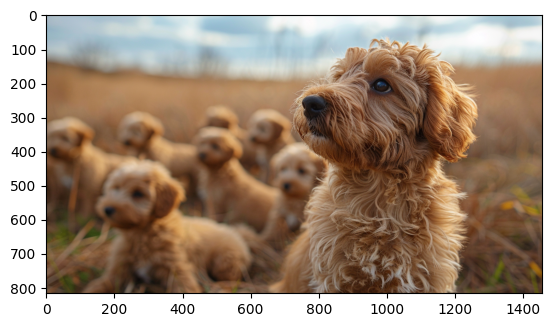

In [19]:
img = mpimg.imread('images/doggo2.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

Before:


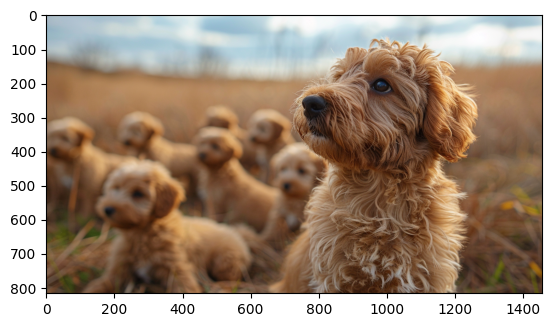

After


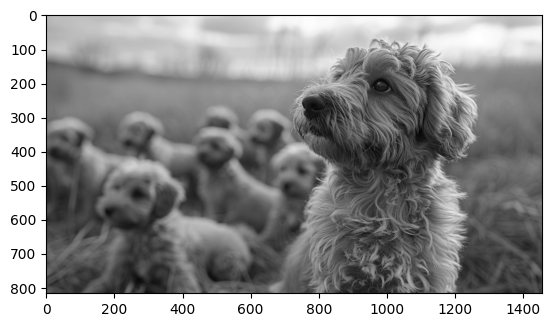

In [22]:
from PIL import Image

def convert_to_grayscale(img_input_path):
    img = mpimg.imread(img_input_path)
    print("Before:")
    plt.imshow(img)
    plt.show()
    grayscale_img = np.dot(img[..., :3], [0.2126, 0.7152, 0.0722])
    print("After")
    plt.imshow(grayscale_img, cmap='gray')

convert_to_grayscale('images/doggo2.png')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [21]:
def linear_interpolation(lambdas, point1, point2):
    # print(lambdas[:, np.newaxis] * point1 + (1-lambdas[:, np.newaxis]) * point2)
    return lambdas[:, np.newaxis] * point1 + (1-lambdas[:, np.newaxis]) * point2

lambdas = np.array([0, 0.5, 1])
points = np.array([[1,1,1], [0, 1, 2]])
print(linear_interpolation(lambdas, [1,1,1], [0, 1, 2]))

# print(0 * [1,1,1] + 1 * [0, 1, 2])
# print(0.5 * np.array([1,1,1]) + 0.5 * np.array([0, 1, 2]))

[[0.  1.  2. ]
 [0.5 1.  1.5]
 [1.  1.  1. ]]
